In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/World Energy Consumption.csv')

# Display the first few rows of the dataset
print(df.head())



         country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
0      

In [ ]:
# Display information about the dataset
print(df.info())

# Summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19600 entries, 0 to 19599
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 19.3+ MB
None
               year    population           gdp  biofuel_cons_change_pct  \
count  19600.000000  1.609000e+04  9.910000e+03              1561.000000   
mean    1974.480051  7.485976e+07  2.294423e+11                48.916331   
std       35.013457  3.004058e+08  7.668896e+11               288.827519   
min     1900.000000  1.833000e+03  1.642060e+08              -100.000000   
25%     1947.000000  1.539341e+06  1.280459e+10                -0.620000   
50%     1984.000000  6.477580e+06  3.870197e+10                 8.354000   
75%     2004.000000  2.176330e+07  1.490459e+11                27.467000   
max     2022.000000  4.721383e+09  1.815162e+13              5659.328000   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count              2432.000000        

In [ ]:
# Check for missing values
print(df.isnull().sum())



country                       0
year                          0
iso_code                   4737
population                 3510
gdp                        9690
                          ...  
wind_elec_per_capita      13297
wind_electricity          12418
wind_energy_per_capita    16075
wind_share_elec           13377
wind_share_energy         15986
Length: 129, dtype: int64


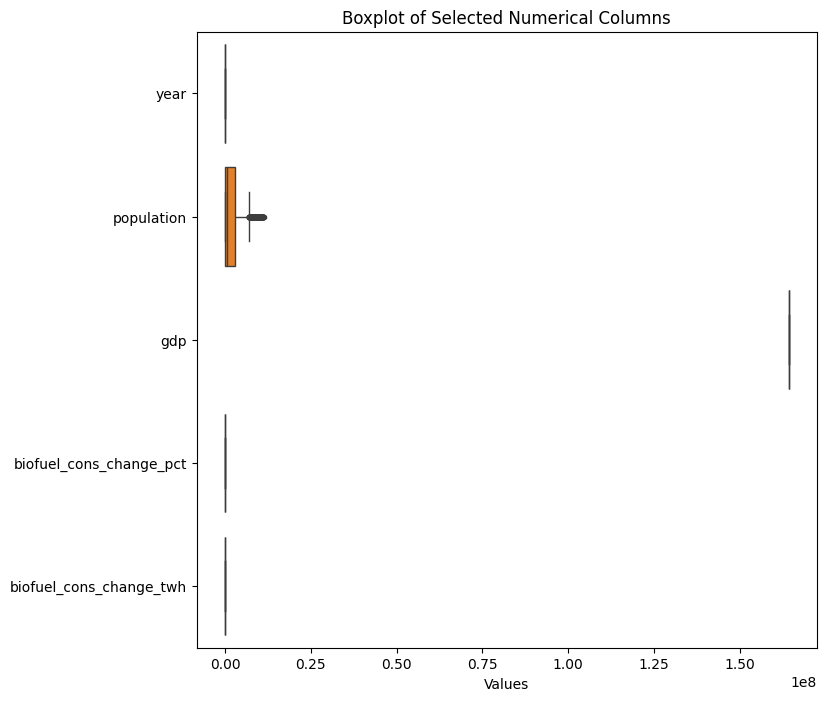

In [ ]:
# Select a subset of numerical columns
selected_numerical_columns = df.select_dtypes(include=[np.number]).columns[:5]  # Select first 5 numerical columns

# Plot boxplots for the selected numerical columns
plt.figure(figsize=(8, 8))
sns.boxplot(data=df[selected_numerical_columns], orient='h', fliersize=3)
plt.xlabel('Values')
plt.title('Boxplot of Selected Numerical Columns')
plt.show()


In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
23,Afghanistan,1900,AFG,4707744.0,164206000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,Afghanistan,1901,AFG,4751177.0,164206000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,Afghanistan,1902,AFG,4802500.0,164206000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Afghanistan,1903,AFG,4861833.0,164206000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,Afghanistan,1904,AFG,4921891.0,164206000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
values_in_column = df['country']
print(values_in_column)

23               Afghanistan
24               Afghanistan
25               Afghanistan
26               Afghanistan
27               Afghanistan
                ...         
19493    Trinidad and Tobago
19494    Trinidad and Tobago
19495    Trinidad and Tobago
19496    Trinidad and Tobago
19497    Trinidad and Tobago
Name: country, Length: 2084, dtype: object


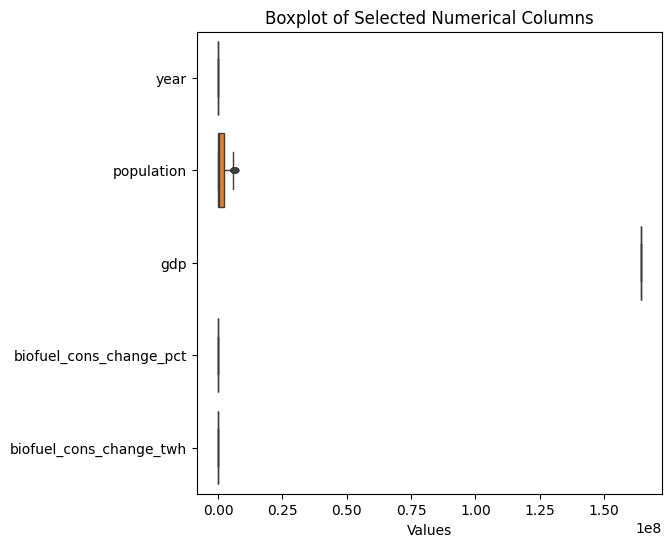

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of numerical columns
selected_numerical_columns = df.select_dtypes(include=[np.number]).columns[:5]  # Select first 5 numerical columns

# Calculate quartiles, IQR, lower and upper bounds for selected numerical columns
Q1 = df[selected_numerical_columns].quantile(0.25)
Q3 = df[selected_numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers for each selected numerical column
for col in selected_numerical_columns:
    df = df[(df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col])]

# Visualize the filtered dataset with boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[selected_numerical_columns], orient='h', fliersize=3)
plt.xlabel('Values')
plt.title('Boxplot of Selected Numerical Columns')
plt.show()


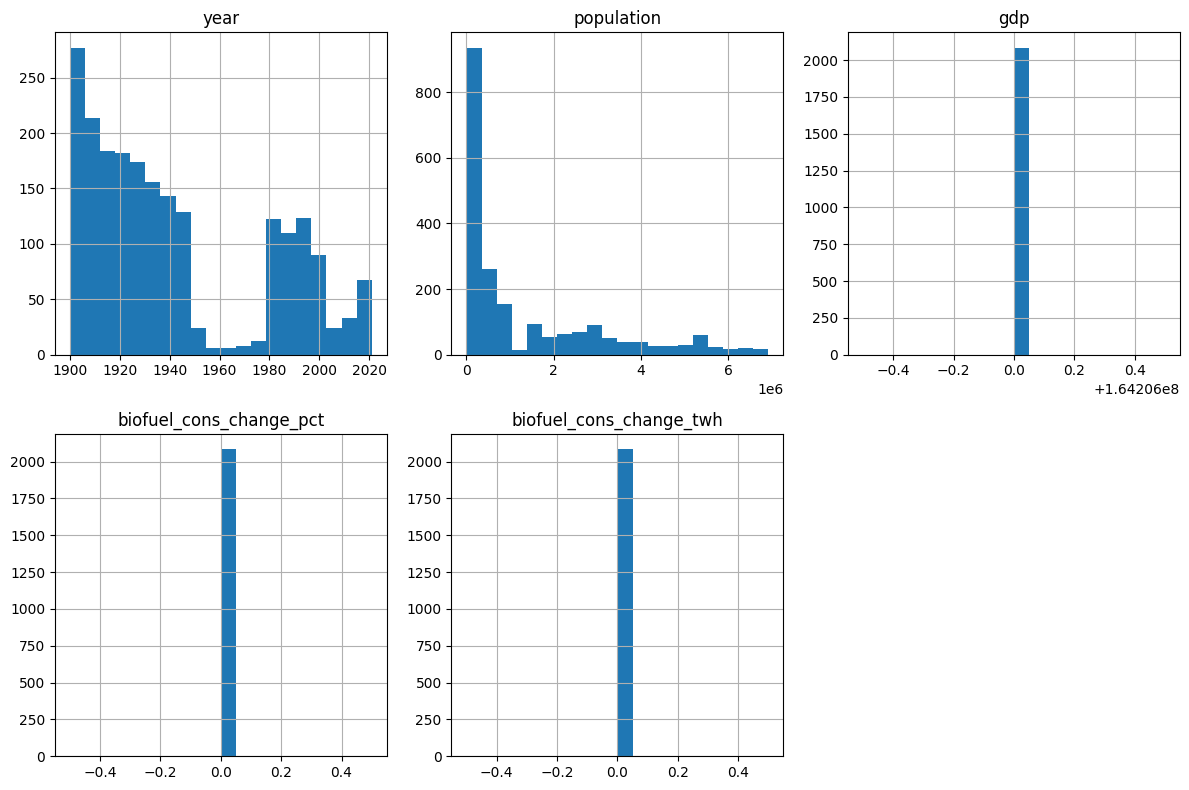

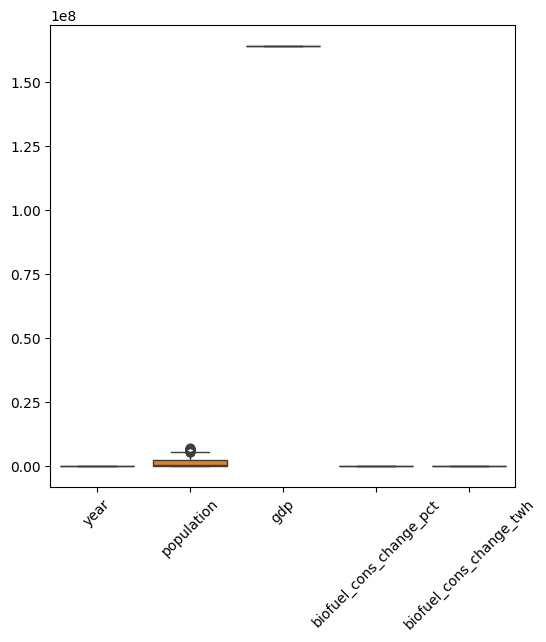

In [ ]:
# Select a subset of numerical variables
selected_numerical_columns = df.select_dtypes(include=[np.number]).columns[:5]  # Select first 5 numerical columns

# Plot histograms for the selected numerical variables
df[selected_numerical_columns].hist(figsize=(12, 8), bins=20, layout=(2, 3))
plt.tight_layout()
plt.show()

# Box plot for selected numerical variables
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[selected_numerical_columns])
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate summary statistics for numerical variables
summary_statistics = df.describe()

# Display summary statistics
print(summary_statistics)


              year    population          gdp  biofuel_cons_change_pct  \
count  2215.000000  2.215000e+03       2215.0                   2215.0   
mean   1941.357562  1.825780e+06  164206000.0                      0.0   
std      35.327637  2.525261e+06          0.0                      0.0   
min    1900.000000  1.833000e+03  164206000.0                      0.0   
25%    1912.000000  1.198050e+05  164206000.0                      0.0   
50%    1930.000000  4.743770e+05  164206000.0                      0.0   
75%    1980.000000  2.843215e+06  164206000.0                      0.0   
max    2021.000000  1.121974e+07  164206000.0                      0.0   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count                   2215.0                   2215.0               2215.0   
mean                       0.0                      0.0                  0.0   
std                        0.0                      0.0                  0.0   
min          

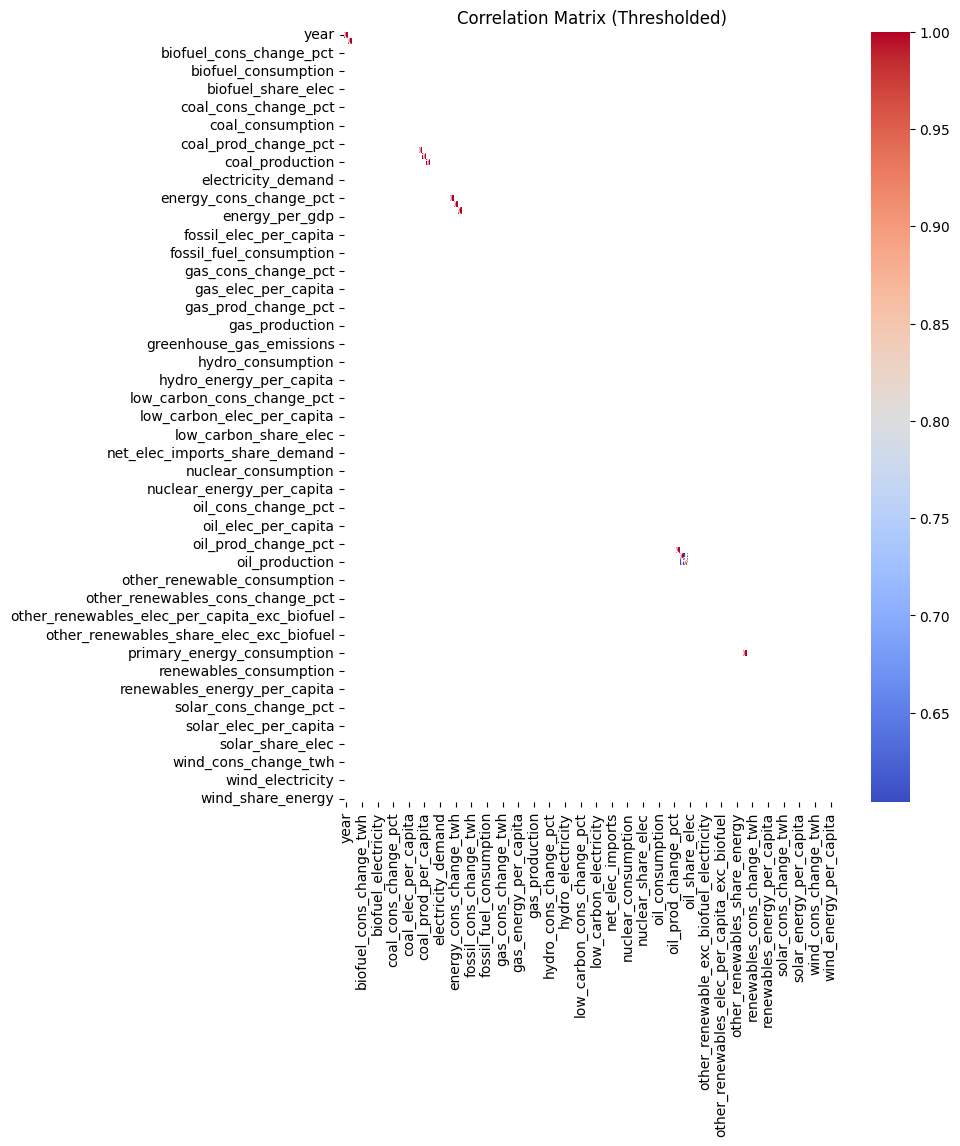

In [ ]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Set threshold for correlation values
threshold = 0.5

# Filter correlations below the threshold
correlation_matrix_filtered = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]

# Visualize filtered correlation matrix as a heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Thresholded)')
plt.show()



In [ ]:
# Perform one-way ANOVA
import scipy.stats as stats
f_statistic, p_value = stats.f_oneway(df[df['population'] == 'Afghanistan']['year'],
                                      df[df['population'] == 'Trinidad']['year'],
                                      df[df['population'] == 'Tobago']['year'])

# Print results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in performance across different populations.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in performance across different populations.")


F-statistic: nan
p-value: nan
Fail to reject the null hypothesis: There is no significant difference in performance across different populations.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Prepare the Data
# Assuming 'X' contains predictor variables and 'y' contains the target variable
X = df[['gdp', 'biofuel_cons_change_pct', 'biofuel_cons_change_twh']]
y = df['population']

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 6: Interpret the Results
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Mean Squared Error: 2970998359899.9077
Coefficients: [0. 0. 0.]
Intercept: 1377214.9064187163


In [ ]:
#population	gdp	biofuel_cons_change_pct	biofuel_cons_change_twh	biofuel_cons_per_capita	biofuel_consumption

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate adjusted R-squared
n = len(X_test)  # Number of samples in the testing set
p = X_test.shape[1]  # Number of predictor variables
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print evaluation metrics
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)
print("RMSE:", rmse)


R-squared: -0.0012638205728610075
Adjusted R-squared: -0.00853692338573886
RMSE: 1723658.4232091657


In [ ]:
# Assuming 'model' is the trained multiple linear regression model

# Get the coefficients (slopes) and intercept (bias) from the model
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients
print("Intercept (Bias):", intercept)
for i, coef in enumerate(coefficients):
    print("Coefficient for predictor variable", i+1, ":", coef)

# Interpret the coefficients
print("\nInterpretation:")
print("The intercept represents the expected value of the target variable when all predictor variables are zero.")

for i, coef in enumerate(coefficients):
    print("For predictor variable", i+1, ":")
    if coef > 0:
        print("- A one-unit increase in this variable is associated with an increase of", coef, "units in the target variable.")
    elif coef < 0:
        print("- A one-unit increase in this variable is associated with a decrease of", abs(coef), "units in the target variable.")
    else:
        print("- This variable has no effect on the target variable.")




Intercept (Bias): 1377214.9064187163
Coefficient for predictor variable 1 : 0.0
Coefficient for predictor variable 2 : 0.0
Coefficient for predictor variable 3 : 0.0

Interpretation:
The intercept represents the expected value of the target variable when all predictor variables are zero.
For predictor variable 1 :
- This variable has no effect on the target variable.
For predictor variable 2 :
- This variable has no effect on the target variable.
For predictor variable 3 :
- This variable has no effect on the target variable.


Split the dataset into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['gdp', 'biofuel_cons_change_pct', 'biofuel_cons_change_twh']]
y = df['population']

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape (X):", X_train.shape)
print("Testing set shape (X):", X_test.shape)
print("Training set shape (y):", y_train.shape)
print("Testing set shape (y):", y_test.shape)


Training set shape (X): (1667, 3)
Testing set shape (X): (417, 3)
Training set shape (y): (1667,)
Testing set shape (y): (417,)


Train the regression model on the training set and evaluate its performance on the
testing set

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. Import the regression model (already imported in previous steps)

# 2. Fit the model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Make predictions on the testing data
y_pred = model.predict(X_test)

# 4. Evaluate the performance of the model
r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE (Root Mean Squared Error)

# Print evaluation metrics
print("R-squared:", r_squared)
print("RMSE:", rmse)


R-squared: -0.0012638205728610075
RMSE: 1723658.4232091657


Use cross-validation techniques to assess the model's robustness and generalization
ability.


In [ ]:
from sklearn.model_selection import cross_val_score

# Define the regression model (e.g., LinearRegression)
model = LinearRegression()

# Perform k-fold cross-validation (e.g., k=5)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # Use R-squared as the evaluation metric

# Print cross-validation scores
print("Cross-Validation R-squared scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))


Cross-Validation R-squared scores: [-0.00143779 -0.00978033 -0.16419289 -0.04907024 -0.0014124 ]
Mean R-squared: -0.04517873027610557


Summarize key findings from the analysis.


In [ ]:
# 1. Regression Model Performance
print("Regression Model Performance:")
print("R-squared:", r_squared)
print("RMSE:", rmse)
print("\n")

# 2. Predictor Variables Impact
print("Predictor Variables Impact:")
print("Intercept (Bias):", intercept)
for i, coef in enumerate(coefficients):
    print("Coefficient for predictor variable", i+1, ":", coef)
print("\n")

# 3. Cross-Validation Results
print("Cross-Validation Results:")
print("Cross-Validation R-squared scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))
print("\n")

# 4. Further Analysis (if applicable)
print("Further Analysis:")
print("Consider exploring interactions between predictor variables, additional features, or alternative models.")


Regression Model Performance:
R-squared: -0.0012638205728610075
RMSE: 1723658.4232091657


Predictor Variables Impact:
Intercept (Bias): 1377214.9064187163
Coefficient for predictor variable 1 : 0.0
Coefficient for predictor variable 2 : 0.0
Coefficient for predictor variable 3 : 0.0


Cross-Validation Results:
Cross-Validation R-squared scores: [-0.00143779 -0.00978033 -0.16419289 -0.04907024 -0.0014124 ]
Mean R-squared: -0.04517873027610557


Further Analysis:
Consider exploring interactions between predictor variables, additional features, or alternative models.
